In [13]:
import pandas as pd
import seaborn as sns

# Data Cleaning

In [3]:
#import csv data
df = pd.read_csv('adjust_sampled_data.csv')
df.head()

,Unnamed: 0,adid,network_name,installed_at,activity_kind,event_name,created_at
0,0,1dcedd19b197650bd08a1f521caa3f8b,Organic,2019-07-06 00:07:04,event,get_contact,2019-07-08 15:33:44
1,1,d621e1bfa590881a68581733052dce57,Organic,2019-07-06 00:14:50,event,get_contact,2019-07-08 15:53:04
2,2,7107c045edc8eb4740ea7d8d7fd0b4aa,Organic,2019-07-06 00:33:40,event,new_post_submit,2019-07-08 10:24:14
3,3,32a53ff379ace92a650f0a41f1d02af1,Organic,2019-07-06 02:33:10,event,get_contact,2019-07-08 09:21:11
4,4,1eaeca850ef726e6c12475e099a9d9de,Organic,2019-07-06 03:28:56,event,get_contact,2019-07-06 14:00:28


In [4]:
#variable definition
# adid : Unique ID of each user , we convert it to userID
# network_name : ad network name
# installed_at : User installation time (with accuracy of seconds)
# activity_kind : Type of activity performed
# event_name : Type of event occurred
# created_at : Time to occur

In [10]:
# split time columns
df['installed_at']= pd.to_datetime(df['installed_at'])
df['date_installed_at'] = df['installed_at'].dt.date
df['time_installed_at'] = df['installed_at'].dt.time

df['created_at']= pd.to_datetime(df['created_at'])
df['date_created_at'] = df['created_at'].dt.date
df['time_created_at'] = df['created_at'].dt.time

# Clear extra columns
df["userID"] = df['adid'].copy()
df1 = df.drop(['adid','created_at','installed_at'],axis=1)

# sort
df1 = df1[['userID', 'network_name','activity_kind','event_name','date_installed_at','time_installed_at','date_created_at','time_created_at']]

df1.head()

,userID,network_name,activity_kind,event_name,date_installed_at,time_installed_at,date_created_at,time_created_at
0,1dcedd19b197650bd08a1f521caa3f8b,Organic,event,get_contact,2019-07-06,00:07:04,2019-07-08,15:33:44
1,d621e1bfa590881a68581733052dce57,Organic,event,get_contact,2019-07-06,00:14:50,2019-07-08,15:53:04
2,7107c045edc8eb4740ea7d8d7fd0b4aa,Organic,event,new_post_submit,2019-07-06,00:33:40,2019-07-08,10:24:14
3,32a53ff379ace92a650f0a41f1d02af1,Organic,event,get_contact,2019-07-06,02:33:10,2019-07-08,09:21:11
4,1eaeca850ef726e6c12475e099a9d9de,Organic,event,get_contact,2019-07-06,03:28:56,2019-07-06,14:00:28


In [11]:
# nan variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785168 entries, 0 to 785167
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   userID             785168 non-null  object
 1   network_name       785168 non-null  object
 2   activity_kind      785168 non-null  object
 3   event_name         681147 non-null  object
 4   date_installed_at  785168 non-null  object
 5   time_installed_at  785168 non-null  object
 6   date_created_at    785168 non-null  object
 7   time_created_at    785168 non-null  object
dtypes: object(8)
memory usage: 47.9+ MB


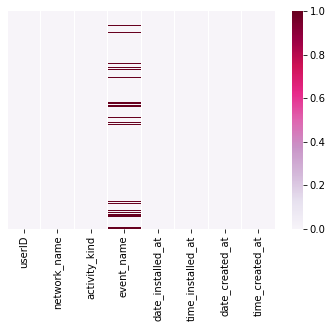

In [14]:
# If an event has occurred, column A has a value, otherwise it is empty. 
# So having null information in this column is OK.
heat_map = sns.heatmap(df1.isnull(), yticklabels = False, cbar = True, cmap = "PuRd", vmin = 0, vmax = 1)